<a href="https://colab.research.google.com/github/anmol1810rs/The_Sparks_Foundation_Internship/blob/main/TSF_Task1_SupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK1 - Supervised_Machine_Learning**

My submission of results against task #1 for GRIP internship at The Sparks Foundation. The task basically explores the basics of Supervised Learnig by making predictions between Hours Vs Scores of Students, using Linear Regression implemented with  Scikit Learn.

# **Problem Statement:**




Predicting the  marks and percentage of a given  student based on the number of hours of study .Calculating  the predicted score if a student studies for 9.25 hrs/day?(based as per instructions given for the task)

In [39]:
#Importing the necessary libraries for evaluation purposes
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
#Reading the data(csv file) from the datset provided by making use of Pandas Dataframe
df  = pd.read_csv("http://bit.ly/w-data") 
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [41]:
#Summarizing the various observations made form the dataset, using the describe() function 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


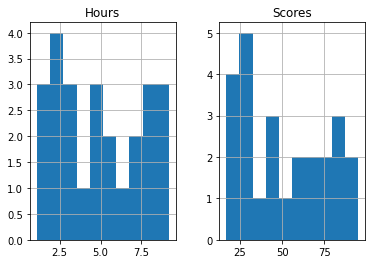

In [42]:
#A graphical view of value distribution of each of hte specified attributes(Hours and Scores)
viz  = df[['Hours','Scores']]
viz.hist()
plt.show()

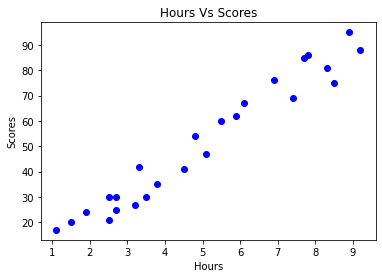

In [43]:
#Visualizing the Dataset 
plt.scatter(df.Hours, df.Scores,  color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores")
plt.show()

In [45]:
#Distributing the Dataset using Training and Testing Arrays
mask = np.random.rand(len(df)) < 0.8
train = df[mask]  #to select hte 80 percent data as training set 
test = df[~mask]  # to select the rest of the data as the test set

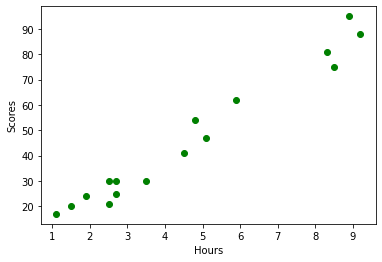

In [46]:
plt.scatter(train.Hours, train.Scores,  color='green')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [49]:
#Visualizing the coefficients and the intercept values 
# Training the linear regression model
from sklearn import linear_model
regressor = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
regressor.fit (train_x, train_y)
# The coefficients
print ('Value of Coefficients: ', regressor.coef_)
print ('Value of Intercept: ',regressor.intercept_)

Value of Coefficients:  [[9.28168291]]
Value of Intercept:  [3.55425859]


Text(0, 0.5, 'Scores')

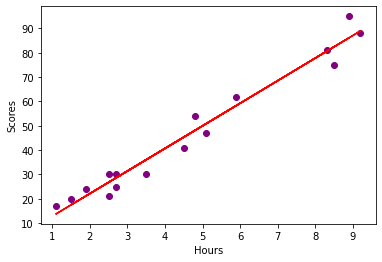

In [50]:
#Visualizing the Data
plt.scatter(train.Hours, train.Scores,  color='purple')
plt.plot(train_x, regressor.coef_[0][0]*train_x + regressor.intercept_[0], '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")

In [51]:
#Checking the Dataset Accuracy by implementing various Analysis methods 
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y_ = regressor.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 6.87
Residual sum of squares (MSE): 52.47
R2-score: 0.87


In [52]:
# Comparing Actual vs Predicted set of Values
df = pd.DataFrame({'Actual': [test_y], 'Predicted': [test_y_]})
print(df)

                                              Actual                                          Predicted
0  [[27], [60], [85], [42], [67], [69], [35], [76...  [[33.255643919958956], [54.60351462288353], [7...


In [53]:
#Testing as per the mentioned conditions in the given question sample 
hrs= np.array([9.25])

n_hrs = hrs.reshape(-1, 1)
own_pred = regressor.predict(n_hrs)
print("No of Hours = {}".format(n_hrs))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [89.40982555]
